In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [42]:
# read df and clear
df = pd.read_csv(r"C:\Users\User\Downloads\Live_20210128.csv")

In [43]:
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


#### Our dataframe looks good. We see that it has 7050 observations and 16 variables. The last 4 columns are empty. Let's drop them.

In [44]:
df = df.drop(["Column1", "Column2", "Column3", "Column4"], axis="columns")

In [45]:
# analysing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


#### We see that the status_type and status_published variables are of type "Object". We need to set them to numerical/datetime/categorical format in order to work with them. 

In [46]:
print(df["status_type"].value_counts())   # displaying all the status types that this variable contains. They are photo, video, status and link.
df["status_type"] = df["status_type"].astype("category")  # this variable is now categorical

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [47]:
print(df["status_published"])  # status_published displays first the date and then the time of the publication
df["status_published"] = pd.to_datetime(df["status_published"]) # converting the values in the "status_published" to datetime objects

0        4/22/2018 6:00
1       4/21/2018 22:45
2        4/21/2018 6:17
3        4/21/2018 2:29
4        4/18/2018 3:22
             ...       
7045     9/24/2016 2:58
7046    9/23/2016 11:19
7047    9/21/2016 23:03
7048     9/20/2016 0:43
7049    9/10/2016 10:30
Name: status_published, Length: 7050, dtype: object


In [48]:
df.dtypes  #the newly assigned types of the variables

status_id                    int64
status_type               category
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
dtype: object

#### No problems were thrown by the conversion to int => the data does not contain any nan values
#### Now check for duplicates -> first check if there are more than one of the same ID, then check if observations have different IDs but the same information (the exact same time of publishing and so on)

In [49]:
df.nunique() #counting the number of unique values

status_id           7050
status_type            4
status_published    6913
num_reactions       1067
num_comments         993
num_shares           501
num_likes           1044
num_loves            229
num_wows              65
num_hahas             42
num_sads              24
num_angrys            14
dtype: int64

#### The status_ids are all different (all 7050), but there are more than one "status_published" at the exact same point of time (the value for "status_published" is only 6913) which is strange. We can assume that some of these observations are duplicates. We need to check if the other values for these observations are different in order to be sure whether they are duplocate.

In [50]:
df.drop("status_id", axis="columns").drop_duplicates()  

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


#### Here we dropped the variable "status_id". The function drop_duplicates drops all observations from the resulting data frame that are the same.

In [51]:
df = df[df.index.isin(df.drop("status_id", axis="columns").drop_duplicates().index)] # saving the dataframe without duplicates

# .index accesses the index of the resulting dataframe obtained after dropping the "status_id" column and removing duplicates
# df.index.isin(...): This creates a boolean mask by checking if each index value in the original df is present in the index of the newly obtained dataframe. This results in a Series of True and False values.
# The boolean mask is used to filter the original df. It keeps only the rows where the index is present in the index of the newly obtained dataframe

In [52]:
df 

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,2016-09-24 02:58:00,89,0,0,89,0,0,0,0,0
7046,7047,photo,2016-09-23 11:19:00,16,0,0,14,1,0,1,0,0
7047,7048,photo,2016-09-21 23:03:00,2,0,0,1,1,0,0,0,0
7048,7049,photo,2016-09-20 00:43:00,351,12,22,349,2,0,0,0,0


#### After cleaning, our data has 6996 observations and 12 variables.

### Let's look at the correlation between numeric variables.

In [53]:
correlation_matrix = df.select_dtypes(["number"]).corr()
print(correlation_matrix)

               status_id  num_reactions  num_comments  num_shares  num_likes  \
status_id       1.000000      -0.207802      0.186255    0.210293  -0.230868   
num_reactions  -0.207802       1.000000      0.156146    0.259594   0.994671   
num_comments    0.186255       0.156146      1.000000    0.640524   0.105888   
num_shares      0.210293       0.259594      0.640524    1.000000   0.179614   
num_likes      -0.230868       0.994671      0.105888    0.179614   1.000000   
num_loves       0.157392       0.310600      0.521304    0.820277   0.212665   
num_wows        0.054703       0.261678      0.163493    0.409794   0.199996   
num_hahas       0.116399       0.179630      0.325051    0.399851   0.123100   
num_sads        0.036681       0.082065      0.257533    0.218613   0.057080   
num_angrys      0.097134       0.136038      0.239545    0.332343   0.096249   

               num_loves  num_wows  num_hahas  num_sads  num_angrys  
status_id       0.157392  0.054703   0.116399  0.

In [54]:
exclude_variable = 'status_id'
correlation_matrix_excluded = correlation_matrix.drop(exclude_variable).drop(exclude_variable, axis=1)

<Axes: >

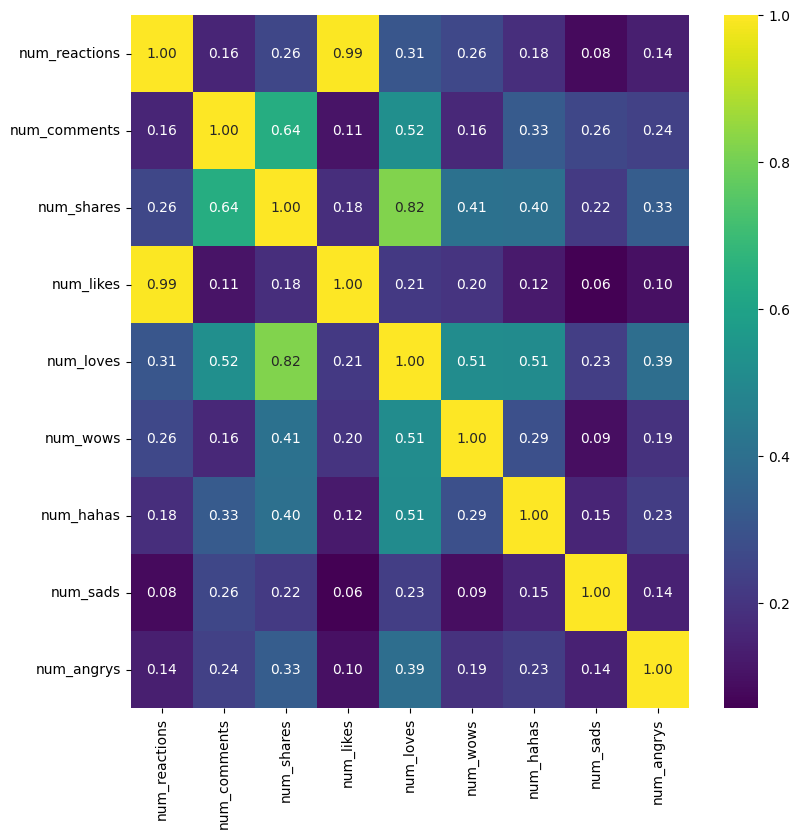

In [55]:
plt.figure(figsize = (9,9))
sns.heatmap(correlation_matrix_excluded, annot = True, fmt = ".2f", cmap = "viridis")

We can see that the correlation between likes and number of reactions is almost 1. The cause might be that the most reactions are likes and as such almost the whole information of number of likes is contained in the number of reactions. Also the 3 variables num_comments, num_shares and num_loves correlate between each other a lot.

In [56]:
print(df.describe().round(2))

       status_id               status_published  num_reactions  num_comments  \
count    6996.00                           6996        6996.00       6996.00   
mean     3505.52  2016-11-16 06:45:15.737564416         225.09        225.65   
min         1.00            2012-07-15 02:51:00           0.00          0.00   
25%      1749.75            2016-03-08 02:38:30          17.00          0.00   
50%      3498.50            2017-11-17 01:04:30          58.00          4.00   
75%      5250.25            2018-03-06 07:14:15         216.00         22.25   
max      7050.00            2018-06-13 01:12:00        4710.00      20990.00   
std      2029.77                            NaN         452.95        892.92   

       num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
count     6996.00    6996.00    6996.00   6996.00    6996.00   6996.00   
mean        40.28     210.04      12.76      1.25       0.70      0.23   
min          0.00       0.00       0.00      0.00       0

We can try how does the time affect the number of reactions. First extract see how the time series information develops.

In [57]:
df = df.sort_values("status_published")

In [58]:
#fig = go.Figure()
#fig.add_trace(go.Scatter(
#    name="Number of Reactions",
#    mode="lines", x=df["status_published"], y=df["num_reactions"], line={'width': 6}
#))
#
#fig.add_trace(go.Scatter(
#    name="Number of Likes",
#    mode="lines", x=df["status_published"], y=df["num_likes"], stackgroup = 'one'
#))
#
#fig.add_trace(go.Scatter(
#    name="Number of Loves",
#    mode="lines", x=df["status_published"], y=df["num_loves"], stackgroup = 'one'
#))
#
#fig.add_trace(go.Scatter(
#    name="Number of Wows",
#    mode="lines", x=df["status_published"], y=df["num_wows"], stackgroup = 'one'
#))
#
#fig.add_trace(go.Scatter(
#    name="Number of Hahas",
#    mode="lines", x=df["status_published"], y=df["num_hahas"], stackgroup = 'one'
#))
#
#fig.add_trace(go.Scatter(
#    name="Number of Sads",
#    mode="lines", x=df["status_published"], y=df["num_sads"], stackgroup = 'one'
#))
#
#fig.add_trace(go.Scatter(
#    name="Number of Angrys",
#    mode="lines", x=df["status_published"], y=df["num_angrys"], stackgroup = 'one'
#))
#
#
#fig.update_xaxes(rangeslider_visible=True,
#                     rangeselector=dict(
#        buttons=list([
#            dict(count=7, label="1w", step="day", stepmode="backward"),
#            dict(count=1, label="1m", step="month", stepmode="backward"),
#            dict(count=6, label="6m", step="month", stepmode="backward"),
#            dict(count=1, label="1y", step="year", stepmode="backward"),
#            dict(step="all")
#        ]))
#)
#
#fig.show()

### We can see that the most reactions are in the period after 2016. This is because Facebook rolled them out on 24.02.2016. That also explains the high correlation between likes and number of reactions

#### Let's see if there is any circle dependency in the datetime of likes

## TO DO: Analysis of the other seasonalities

In [59]:
#df_plot = df.copy()
#df_plot["hour_dt"] = df["status_published"].dt.hour + 1
#df_plot = df_plot.sort_values("hour_dt")
#df_plot["hour_dt"] = df_plot["hour_dt"].astype("string")
#
#fig = go.Figure()
#fig.add_trace(go.Scatterpolar(
#        r = df_plot["num_reactions"],
#        theta = df_plot["hour_dt"],
#        mode = 'lines',
#    ))
#
#fig = px.line_polar(df_plot, r="num_reactions", theta="hour_dt", line_close=True,)#, color="strength",
#                    #color_discrete_sequence=px.colors.sequential.Plasma_r,)
#
#fig.update_traces(fill='toself')
#
#fig.show()

In [60]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [84]:
#dict_replace = {"photo": 1, "status" : 2, "video" : 3, "link" : 4}
#
#fig = go.Figure(data=
#    go.Parcoords(
#        line = dict(color = df['status_type'].replace(dict_replace), showscale = True,
#                    colorscale = [[0,'purple'],[0.33,'lightseagreen'],[0.66,'gold'],[1,'blue']]),
#        dimensions = list([
#            dict(label = 'Number of Reactions', values = df['num_reactions']),
#           dict(label = 'Number of Comments', values = df['num_comments']),
#            dict(label = 'Number of Shares', values = df['num_shares']),
#            dict(label = 'Number of Shares', values = df['num_wows'])
#        ])
#    )
#)
#
#fig.update_layout(
#    plot_bgcolor = 'white',
#    paper_bgcolor = 'white'
#)
#
#fig.update_layout(
#    title=dict(text="1 is Photo, 2 is Status, 3 is Video and 4 is link", font=dict(size=20), yref='paper')
#)
#
#fig.show()